In [1]:
from urllib import request
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import decomposition
from sklearn import preprocessing
sns.set()
# Python program to read 
# json file 
import pandas
import random
import cv2

import os

import csv
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

import json 

Using TensorFlow backend.
C:\Users\jcrro\anaconda3\envs\Env_P6_1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jcrro\anaconda3\envs\Env_P6_1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jcrro\anaconda3\envs\Env_P6_1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jcrro\anaconda3\envs\Env_P6_1

In [2]:
import time
tic = time.clock()

# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [3]:
%matplotlib inline
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from PIL import Image

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Données photos

In [5]:
filename = "dataphotos.csv" 
n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
s = n//999  # sample size of 999%
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
dataphotospourcent = pandas.read_csv(filename, skiprows=skip)

In [6]:
dataphotospourcent

,photo_id,business_id,caption,label
0,06k-7SYBB92Ze_H_6KFamw,QuybD_bJcAB2CHcpTfREYg,NaN,inside
1,0nwIWEI4PzfUwxznuLsJcA,kImf4ivgHInr7kTTJWaVhg,NaN,food
2,0PbWWNSNEyjv6MsRNNuTHw,Ly2ShApiomYZwKehwb7eRA,Squid salad!,food
3,1GToIT7IuvdGoQdvLvaD_w,Ec9CBmL3285XkeHaNp-bSQ,Oxtail Pho,food
4,1igSUdxWF8OBv0lXIgtqAw,QlJztL2aGEXgejgi5JM9Xg,NaN,food
...,...,...,...,...
194,zKNC5AaHxAdn5lQAazsC3w,J1gvlBxU7_YqgYDHTQIgbA,NaN,food
195,zMmUTxiLjMoQY_w74ees_A,i1t1vBPEWkjPVEW9OoDH2A,NaN,food
196,ZUCqhhHAZR3VIXTbLgd0NQ,LynxmsOdpc_odmkSM2bA_w,NaN,inside
197,zUvgAraztllOEY-lAZXcYQ,eZcCFV-8X91ZSnmB9807bw,Celebration cheesecake to go,food


In [7]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

In [8]:
def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [9]:
images_path = 'yelp_photos/photos/'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 200

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(range(len(images)), max_num_images))]


# CNN pour extraction de  features et cluster d'images en utilisant K-means.

In [10]:
path = r"C:\Users\jcrro\Downloads\SCIENTIST_IA\P6\P6_ROSELLO_JEAN-CHRISTOPHE\yelp_photos\photos"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
dataphotos = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            dataphotos.append(file.name)
       

In [11]:
dataphotos2 = []
for dataph in dataphotos:         
        for img in images:
            if img == ("yelp_photos/photos/" + dataph):
                dataphotos2.append(dataph)

In [12]:
dataphotos = dataphotos2

In [13]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [14]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [15]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features


In [16]:
data = {}
p = r"C:\Users\jcrro\Downloads\SCIENTIST_IA\P6\P6_ROSELLO_JEAN-CHRISTOPHE\dataphotos_features.pkl"

# lop through each image in the dataset
for dataph in dataphotos:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(dataph,model)
        data[dataph] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
          
 

filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape
(210, 1, 4096)

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape
(210, 4096)

# get the unique labels (from the flower_labels.csv)
df = pd.read_csv('dataphotospourcent.csv')
label = df['label'].tolist()
unique_labels = list(set(label))


In [17]:
pca = PCA(n_components=2, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [18]:
kmeans = KMeans(n_clusters=len(unique_labels),n_jobs=-1, random_state=22)
kmeans.fit(x)

C:\Users\jcrro\anaconda3\envs\Env_P6_1\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


KMeans(n_clusters=5, n_jobs=-1, random_state=22)

In [19]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [20]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

### CLUSTER 0

Clipping cluster size from 42 to 30


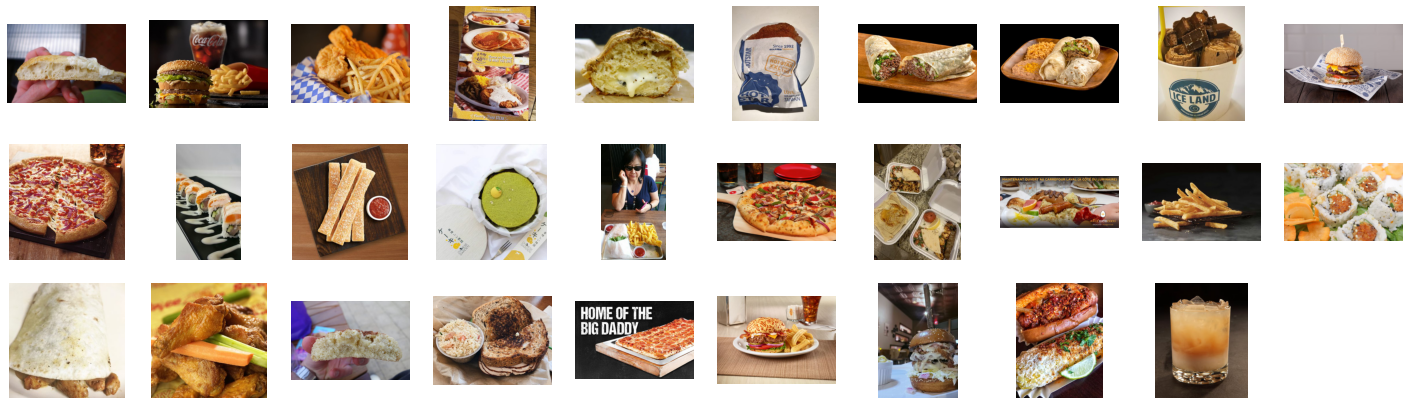

In [21]:
view_cluster(0)

### CLUSTER 1

Clipping cluster size from 66 to 30


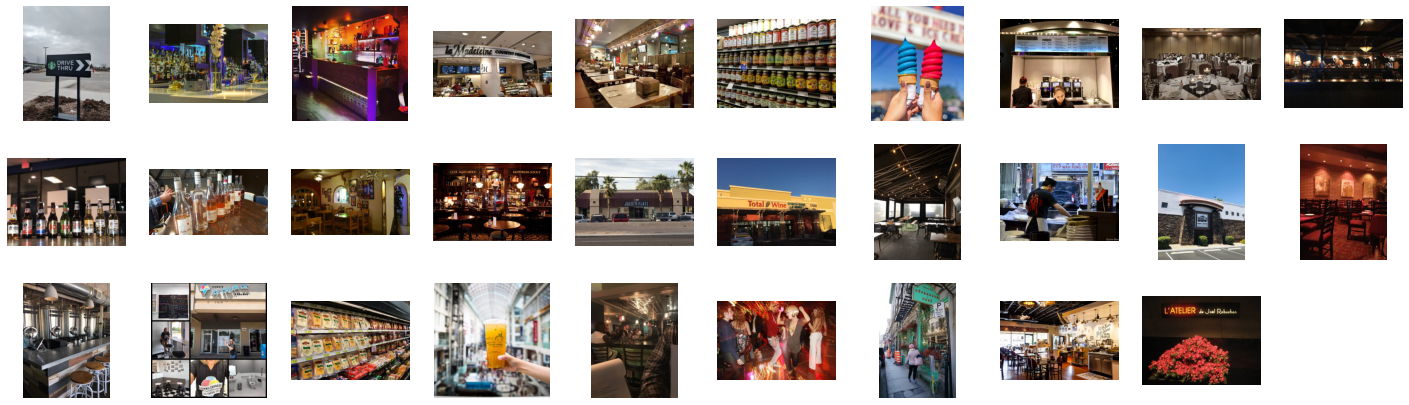

In [22]:
view_cluster(1)

### CLUSTER 2

Clipping cluster size from 48 to 30


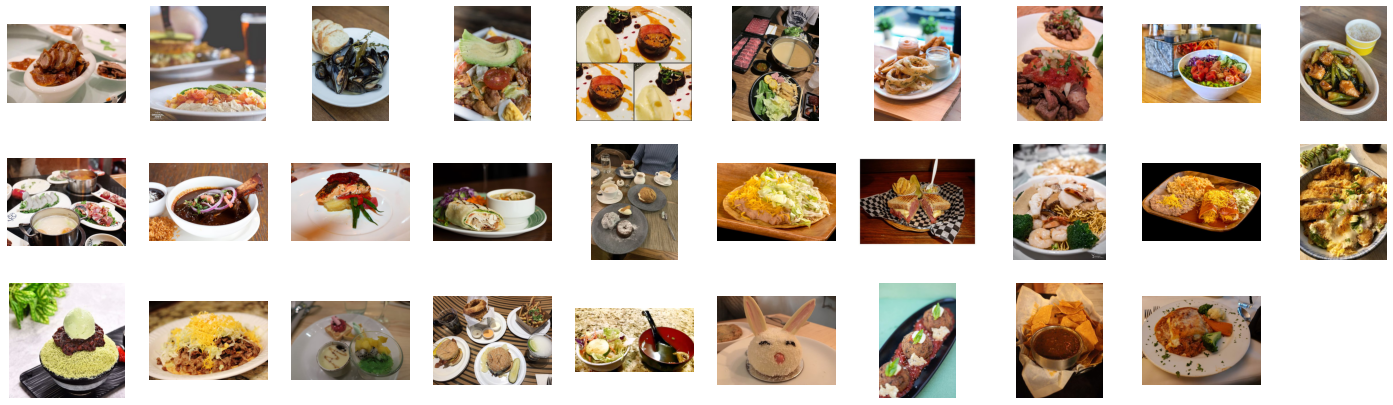

In [23]:
view_cluster(2)

### CLUSTER 3

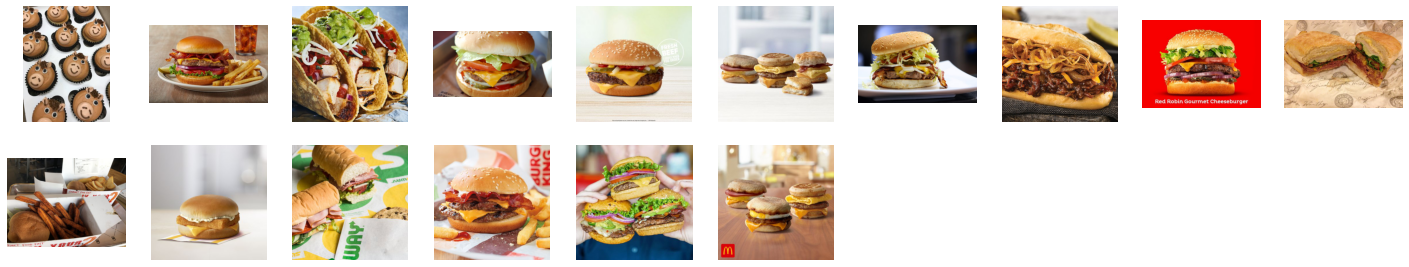

In [24]:
view_cluster(3)

### CLUSTER 4

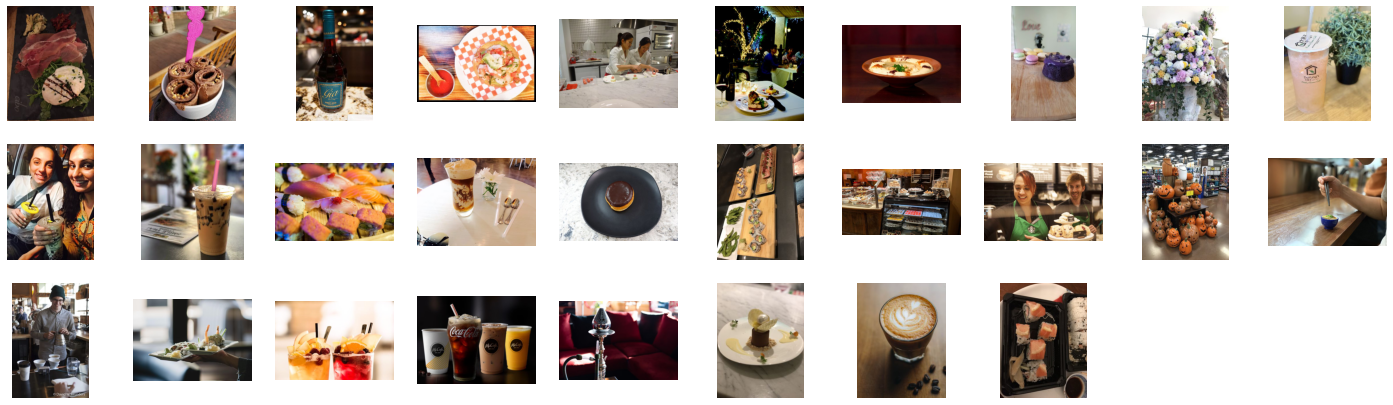

In [25]:
view_cluster(4)